---
# Bussiness Case Study

Let's now explore how we can utilize pandas' functions and methods to address the business case and effectively answer questions related to the business requirements.

## About the dataset
- This case study focuses on a fictional company named **Company X** that specializes in selling electronic products. The company maintains a comprehensive dataset of sales records in CSV format.  
- This dataset represents sales data of the **Company X** contains information about various product orders, including the order ID, SKU ID, product name, quantity, price, discount, total amount, and sales date. The detail of each row in the dataset given below:  
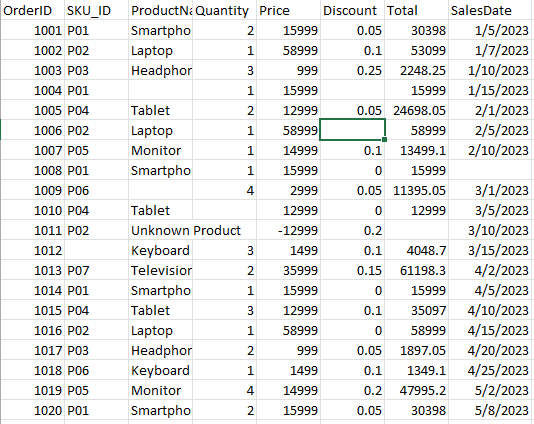
- **`OrderID`**: A unique identifier for **each order**.
- **`SKU_ID`**: Stock keeping Unit that is a unique identifier for each product.
- **`ProductName`**: The name of the product being sold.
- **`Quantity`**: The quantity of the product being purchased in each order.
- **`Price`**: The price of each unit of the product.
- **`Discount`**: The discount applied to the product.
- **`Total`**: The total amount for each order after applying the discount.
- **`SalesDate`**: The date when the sales happened.

The dataset includes **redundancy** such as **missing values**, **non-proper format, and repetitive data**. The missing values are represented as **empty values** or **NaN** values. The dataset also includes examples of products, such as smartphones, laptops, headphones, tablets, monitors, televisions, and keyboards.

## Reading a Tabular Data
To begin the analysis, the first step is to read the sales data into a pandas DataFrame. The data is stored in tabular format, where each row represents a sales transaction and each column represents a specific attribute such as SKU ID, customer name, sales quantity, etc.

In [1]:
import pandas as pd
df = pd.read_csv('sales_data.csv')

In [2]:
# df

## Displaying a Data Frame
Once the data is loaded into a DataFrame, Let's display the DataFrame's contents, by various methods such as head, tail, and a sample of the data.

In [3]:
# first 5 rows of the DataFrame
df.head()

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
0,1001,P01,Smartphone,2.0,15999,0.05,30398.00,1/5/2023
1,1002,P02,Laptop,1.0,58999,0.10,53099.00,1/7/2023
2,1003,P03,Headphones,3.0,999,0.25,2248.25,1/10/2023
3,1004,P01,NaN,1.0,15999,NaN,15999.00,1/15/2023
4,1005,P04,Tablet,2.0,12999,0.05,24698.05,2/1/2023


In [4]:
# last five rows of the DataFrame
df.tail()

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
15,1016,P02,Laptop,1.0,58999,0.00,58999.00,4/15/2023
16,1017,P03,Headphones,2.0,999,0.05,1897.05,4/20/2023
17,1018,P06,Keyboard,1.0,1499,0.10,1349.10,4/25/2023
18,1019,P05,Monitor,4.0,14999,0.20,47995.20,5/2/2023
19,1020,P01,Smartphone,2.0,15999,0.05,30398.00,5/8/2023


In [5]:
# random five sample of the DataFrame
df.sample(5)

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
7,1008,P01,Smartphone,1.0,15999,0.00,15999.00,NaN
14,1015,P04,Tablet,3.0,12999,0.10,35097.00,4/10/2023
8,1009,P06,NaN,4.0,2999,0.05,11395.05,3/1/2023
10,1011,P02,Unknown Product,NaN,-12999,0.20,NaN,3/10/2023
2,1003,P03,Headphones,3.0,999,0.25,2248.25,1/10/2023


In [6]:
# Number of rows and columns
df.shape

(20, 8)

In [7]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      20 non-null     int64  
 1   SKU_ID       19 non-null     object 
 2   ProductName  18 non-null     object 
 3   Quantity     18 non-null     float64
 4   Price        20 non-null     int64  
 5   Discount     18 non-null     float64
 6   Total        19 non-null     float64
 7   SalesDate    19 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ KB


## Indexing & Slicing
Indexing and slicing play a vital role in data exploration. Let's explore some of the techniques, such as selecting specific rows and columns based on their labels or positions, slicing rows based on conditions, and accessing individual cells.  
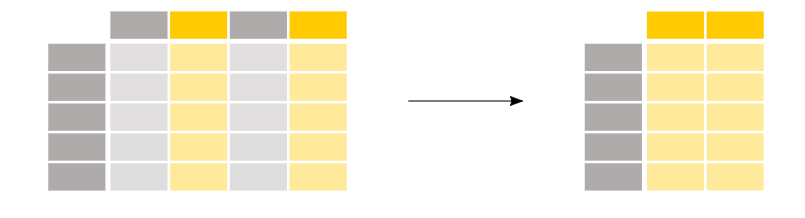

In [8]:
# Accessing individual cells
prod_Name = df.loc[5, 'ProductName']
prod_Name

'Laptop'

In [9]:
# Selecting rows based on index position
some_rows = df.iloc[2:5]
some_rows

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
2,1003,P03,Headphones,3.0,999,0.25,2248.25,1/10/2023
3,1004,P01,NaN,1.0,15999,NaN,15999.00,1/15/2023
4,1005,P04,Tablet,2.0,12999,0.05,24698.05,2/1/2023


## Filtering the DataFrame
Let's filter the DataFrame based on specific conditions, such as extracting sales records for a particular product, filtering based on date range, or identifying high-value transactions exceeding a certain threshold.  
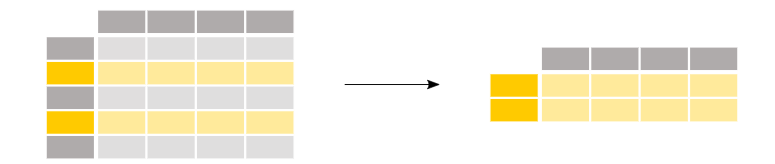

In [10]:
# Filtering based on a specific product such as "SmartPhone"
filtered_product = df[df['ProductName'] == 'Smartphone']
filtered_product

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
0,1001,P01,Smartphone,2.0,15999,0.05,30398.0,1/5/2023
7,1008,P01,Smartphone,1.0,15999,0.00,15999.0,NaN
13,1014,P01,Smartphone,1.0,15999,0.00,15999.0,4/5/2023
19,1020,P01,Smartphone,2.0,15999,0.05,30398.0,5/8/2023


In [11]:
# Filtering based on a date range
start_date = '2022-02-01'
end_date = '2023-03-01'
filtered_date_range = df[(df['SalesDate'] >= start_date) & (df['SalesDate'] <= end_date)]
filtered_date_range

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate


In [12]:
# Filtering high-value transactions above 40000
threshold = 40000
high_value_transactions = df[df['Total'] > threshold]
high_value_transactions

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
1,1002,P02,Laptop,1.0,58999,0.10,53099.0,1/7/2023
5,1006,P02,Laptop,1.0,58999,NaN,58999.0,2/5/2023
12,1013,P07,Television,2.0,35999,0.15,61198.3,4/2/2023
15,1016,P02,Laptop,1.0,58999,0.00,58999.0,4/15/2023
18,1019,P05,Monitor,4.0,14999,0.20,47995.2,5/2/2023


## Sorting
Sorting the data based on specific columns can provide valuable insights. Let's sort the DataFrame in ascending or descending order, and also sort based on multiple columns for the analysis.

In [13]:
# Sorting by a single column
sorted_df = df.sort_values('Price', ascending=False)  # in the descending order
sorted_df

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
15,1016,P02,Laptop,1.0,58999,0.00,58999.00,4/15/2023
5,1006,P02,Laptop,1.0,58999,NaN,58999.00,2/5/2023
1,1002,P02,Laptop,1.0,58999,0.10,53099.00,1/7/2023
12,1013,P07,Television,2.0,35999,0.15,61198.30,4/2/2023
0,1001,P01,Smartphone,2.0,15999,0.05,30398.00,1/5/2023
7,1008,P01,Smartphone,1.0,15999,0.00,15999.00,NaN
13,1014,P01,Smartphone,1.0,15999,0.00,15999.00,4/5/2023
19,1020,P01,Smartphone,2.0,15999,0.05,30398.00,5/8/2023
3,1004,P01,NaN,1.0,15999,NaN,15999.00,1/15/2023
6,1007,P05,Monitor,1.0,14999,0.10,13499.10,2/10/2023


In [14]:
# Sorting by multiple columns
sorted_df = df.sort_values(['ProductName', 'SalesDate'])
sorted_df

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
2,1003,P03,Headphones,3.0,999,0.25,2248.25,1/10/2023
16,1017,P03,Headphones,2.0,999,0.05,1897.05,4/20/2023
11,1012,NaN,Keyboard,3.0,1499,0.10,4048.70,3/15/2023
17,1018,P06,Keyboard,1.0,1499,0.10,1349.10,4/25/2023
1,1002,P02,Laptop,1.0,58999,0.10,53099.00,1/7/2023
5,1006,P02,Laptop,1.0,58999,NaN,58999.00,2/5/2023
15,1016,P02,Laptop,1.0,58999,0.00,58999.00,4/15/2023
6,1007,P05,Monitor,1.0,14999,0.10,13499.10,2/10/2023
18,1019,P05,Monitor,4.0,14999,0.20,47995.20,5/2/2023
0,1001,P01,Smartphone,2.0,15999,0.05,30398.00,1/5/2023


## Dropping Column/s
Not all columns might be relevant for the analysis. Let's demonstrate how to drop unnecessary columns from the DataFrame to focus only on the essential attributes.

In [15]:
# Dropping a single column
df_dropped = df.drop('Discount', axis=1)
df_dropped

,OrderID,SKU_ID,ProductName,Quantity,Price,Total,SalesDate
0,1001,P01,Smartphone,2.0,15999,30398.00,1/5/2023
1,1002,P02,Laptop,1.0,58999,53099.00,1/7/2023
2,1003,P03,Headphones,3.0,999,2248.25,1/10/2023
3,1004,P01,NaN,1.0,15999,15999.00,1/15/2023
4,1005,P04,Tablet,2.0,12999,24698.05,2/1/2023
5,1006,P02,Laptop,1.0,58999,58999.00,2/5/2023
6,1007,P05,Monitor,1.0,14999,13499.10,2/10/2023
7,1008,P01,Smartphone,1.0,15999,15999.00,NaN
8,1009,P06,NaN,4.0,2999,11395.05,3/1/2023
9,1010,P04,Tablet,NaN,12999,12999.00,3/5/2023


In [16]:
# Dropping multiple columns
columns_to_drop = ['Discount', 'SalesDate']

# df_dropped = df.drop(columns_to_drop, axis=1, inplace  = True) # we can also drop the column but it will make changes in the orginal data frame

df_dropped = df.drop(columns_to_drop, axis=1)

df_dropped

,OrderID,SKU_ID,ProductName,Quantity,Price,Total
0,1001,P01,Smartphone,2.0,15999,30398.00
1,1002,P02,Laptop,1.0,58999,53099.00
2,1003,P03,Headphones,3.0,999,2248.25
3,1004,P01,NaN,1.0,15999,15999.00
4,1005,P04,Tablet,2.0,12999,24698.05
5,1006,P02,Laptop,1.0,58999,58999.00
6,1007,P05,Monitor,1.0,14999,13499.10
7,1008,P01,Smartphone,1.0,15999,15999.00
8,1009,P06,NaN,4.0,2999,11395.05
9,1010,P04,Tablet,NaN,12999,12999.00


## Missing Values
Data often contains missing values, which can impact the accuracy of analysis.

In [17]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

OrderID        0
SKU_ID         1
ProductName    2
Quantity       2
Price          0
Discount       2
Total          1
SalesDate      1
dtype: int64

In [18]:
# Counting the number of missing values in a specific column
missing_values_in_column = df['Discount'].isnull().sum()
missing_values_in_column

2

## Handling Missing Values
We will learn techniques to handle missing values, such as dropping rows or columns with missing values, replacing missing values with appropriate substitutes, or [interpolating](https://www.wallstreetmojo.com/interpolation/) (statistical method) missing values based on surrounding data points.

In [19]:
# Dropping rows with missing values
df_dropped_rows = df.dropna()
df_dropped_rows

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
0,1001,P01,Smartphone,2.0,15999,0.05,30398.00,1/5/2023
1,1002,P02,Laptop,1.0,58999,0.10,53099.00,1/7/2023
2,1003,P03,Headphones,3.0,999,0.25,2248.25,1/10/2023
4,1005,P04,Tablet,2.0,12999,0.05,24698.05,2/1/2023
6,1007,P05,Monitor,1.0,14999,0.10,13499.10,2/10/2023
12,1013,P07,Television,2.0,35999,0.15,61198.30,4/2/2023
13,1014,P01,Smartphone,1.0,15999,0.00,15999.00,4/5/2023
14,1015,P04,Tablet,3.0,12999,0.10,35097.00,4/10/2023
15,1016,P02,Laptop,1.0,58999,0.00,58999.00,4/15/2023
16,1017,P03,Headphones,2.0,999,0.05,1897.05,4/20/2023


In [20]:
# Dropping columns with missing values
df_dropped_columns = df.dropna(axis=1)
df_dropped_columns

,OrderID,Price
0,1001,15999
1,1002,58999
2,1003,999
3,1004,15999
4,1005,12999
5,1006,58999
6,1007,14999
7,1008,15999
8,1009,2999
9,1010,12999


In [21]:
# Replacing missing values with a default value
df_filled = df.fillna({'Discount': 0, 'Total': 0})
df_filled

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate
0,1001,P01,Smartphone,2.0,15999,0.05,30398.00,1/5/2023
1,1002,P02,Laptop,1.0,58999,0.10,53099.00,1/7/2023
2,1003,P03,Headphones,3.0,999,0.25,2248.25,1/10/2023
3,1004,P01,NaN,1.0,15999,0.00,15999.00,1/15/2023
4,1005,P04,Tablet,2.0,12999,0.05,24698.05,2/1/2023
5,1006,P02,Laptop,1.0,58999,0.00,58999.00,2/5/2023
6,1007,P05,Monitor,1.0,14999,0.10,13499.10,2/10/2023
7,1008,P01,Smartphone,1.0,15999,0.00,15999.00,NaN
8,1009,P06,NaN,4.0,2999,0.05,11395.05,3/1/2023
9,1010,P04,Tablet,NaN,12999,0.00,12999.00,3/5/2023


## Derived Column from Existing Columns
Creating new columns based on existing ones can provide additional insights. Let's demonstrate how to derive new columns, such as calculating the **total sales amount or profit margin or some other derived features** based on existing attributes.  
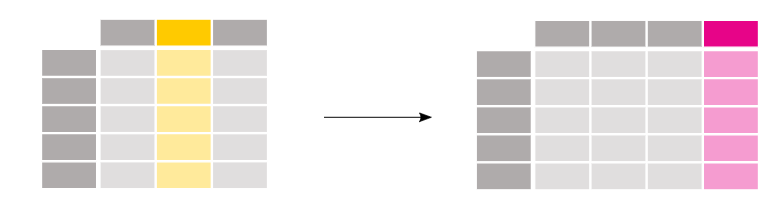

In [22]:
# Calculating the discounted price
df['DiscountedPrice'] = df['Price'] * (1 - df['Discount'])
df.head()

,OrderID,SKU_ID,ProductName,Quantity,Price,Discount,Total,SalesDate,DiscountedPrice
0,1001,P01,Smartphone,2.0,15999,0.05,30398.00,1/5/2023,15199.05
1,1002,P02,Laptop,1.0,58999,0.10,53099.00,1/7/2023,53099.10
2,1003,P03,Headphones,3.0,999,0.25,2248.25,1/10/2023,749.25
3,1004,P01,NaN,1.0,15999,NaN,15999.00,1/15/2023,NaN
4,1005,P04,Tablet,2.0,12999,0.05,24698.05,2/1/2023,12349.05


## Statistical Measures
Pandas offers various statistical functions to summarize the data. We will explore methods to calculate **descriptive statistics**, including mean, median, standard deviation, minimum, and maximum values for different columns.

In [23]:
# Calculating the mean price
df['Price'].mean()

17849.1

In [24]:
# Calculating the maximum total
df['Total'].max()

61198.3

In [25]:
df.describe()

,OrderID,Quantity,Price,Discount,Total,DiscountedPrice
count,20.00000,18.000000,20.000000,18.000000,19.000000,18.000000
mean,1010.50000,1.944444,17849.100000,0.086111,26121.831579,14693.619444
std,5.91608,1.055642,20245.761875,0.074371,20858.083382,17540.423300
min,1001.00000,1.000000,-12999.000000,0.000000,1349.100000,-10399.200000
25%,1005.75000,1.000000,2624.000000,0.050000,12197.025000,1724.087500
50%,1010.50000,2.000000,14999.000000,0.075000,15999.000000,12674.025000
75%,1015.25000,2.750000,15999.000000,0.100000,41546.100000,15799.012500
max,1020.00000,4.000000,58999.000000,0.250000,61198.300000,58999.000000


## Aggregating Statistics
To gain a holistic view of the sales performance, Let's learn how to aggregate.

In [26]:
# Aggregating total sales by product
total_sales_by_product = df.groupby('ProductName')['Total'].sum()
total_sales_by_product

ProductName
Headphones           4145.30
Keyboard             5397.80
Laptop             171097.00
Monitor             61494.30
Smartphone          92794.00
Tablet              72794.05
Television          61198.30
Unknown Product         0.00
Name: Total, dtype: float64

In [27]:
# Aggregating total sales by month
df['SalesMonth'] = pd.to_datetime(df['SalesDate']).dt.month
total_sales_by_month = df.groupby('SalesMonth')['Total'].sum()
total_sales_by_month

SalesMonth
1.0    101744.25
2.0     97196.15
3.0     28442.75
4.0    174539.45
5.0     78393.20
Name: Total, dtype: float64